# Assignment 1: Data Visualization
Recreation of an original plot in the field of energy

## Setup

In [5]:
!pip install pillow

In [6]:
!pip install pyfonts

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyfonts import load_google_font

In [4]:
font_600 = load_google_font('IBM Plex Serif', 600)
font_500 = load_google_font('IBM Plex Serif', 500)
font_400 = load_google_font('IBM Plex Serif', 400)

## Data Import

The to-be-created plot is taken from [this](https://ourworldindata.org/energy-mix) link and contains information about per capita primary energy consumption by source in the year 2023. The data can be downloaded from the website and is freely accessibile for everyone. It is also uploaded to my personal repository for this course [here](https://github.com/Rezixx/datavis/tree/main).

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/Rezixx/datavis/refs/heads/main/per-capita-energy-stacked.csv')

The columns will instantly be renamed to simpler column names and to match the naming of the original plot.

In [45]:
df = df.rename(columns={
    'Entity': 'Country',
    'Coal per capita (kWh)': 'Coal',
    'Oil per capita (kWh)': 'Oil',
    'Gas per capita (kWh)': 'Gas',
    'Nuclear per capita (kWh - equivalent)': 'Nuclear',
    'Hydro per capita (kWh - equivalent)': 'Hydropower',
    'Wind per capita (kWh - equivalent)': 'Wind',
    'Solar per capita (kWh - equivalent)': 'Solar',
    'Other renewables per capita (kWh - equivalent)': 'Other renewables'
})

In [12]:
df.head()

,Country,Code,Year,Coal,Oil,Gas,Nuclear,Hydropower,Wind,Solar,Other renewables
58,Africa,NaN,2023,776.449000,1615.1974,1172.4148,15.194586,287.507570,49.484123,34.144825,18.321545
117,Algeria,DZA,2023,42.383976,5222.9680,10151.2430,0.000000,3.917584,0.911329,36.965855,0.000000
176,Angola,AGO,2023,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
235,Argentina,ARG,2023,279.498800,8551.4950,9817.0380,488.098720,1696.718400,821.478400,185.718600,158.705180
294,Asia,NaN,2023,8054.560500,5544.4917,3458.6023,431.556760,1033.049300,575.706600,514.954400,254.794100


The data is now structured into following columns:
- `Entity` name of the measured entity
- `Code`
- `Year`: The year where the consumption was measured.
- `Coal`: The consumption of Coal in kWh per capita
- `Oil`: The consumption of Oil in kWh per capita
- `Gas`:The consumption of Gas in kWh per capita
- `Nuclear`: The consumption of nuclear energy in kWh per capita (adjusted using the substitution method).
- `Hydropower`: The consumption of hydropower energy in kWh per capita (adjusted using the substitution method).
- `Wind`: The consumption of wind energy in kWh per capita (adjusted using the substitution method).
- `Solar`: The consumption of solar energy in kWh per capita (adjusted using the substitution method).
- `Other renewables`: The consumption of other renewables in kWh per capita (adjusted using the substitution method).


## Data Preparation

In [8]:
# List of countries out of original plot
countries_to_plot = [
    'United States', 'Sweden', 'Japan', 'Germany', 'France',
    'China', 'United Kingdom', 'South Africa', 'World', 'Brazil', 'India'
]

sources = [
    'Coal', 'Oil', 'Gas', 'Nuclear', 'Hydropower',
    'Wind', 'Solar', 'Other renewables'
]

colors = {
    'Coal': '#a05961',
    'Oil': '#cd7384',
    'Gas': '#8a65a7',
    'Nuclear': '#339d98', 
    'Hydropower': '#5389c9',
    'Wind': '#33547c', 
    'Solar': '#ea8b7b',
    'Other renewables': '#799a6a'
}

df = df[df["Year"] == 2023]

df_filtered = df[df["Country"].isin(countries_to_plot)].copy()
df_filtered["Total"] = df_filtered[sources].sum(axis=1)
df_filtered = df_filtered.sort_values("Total", ascending=True)

## Plotting

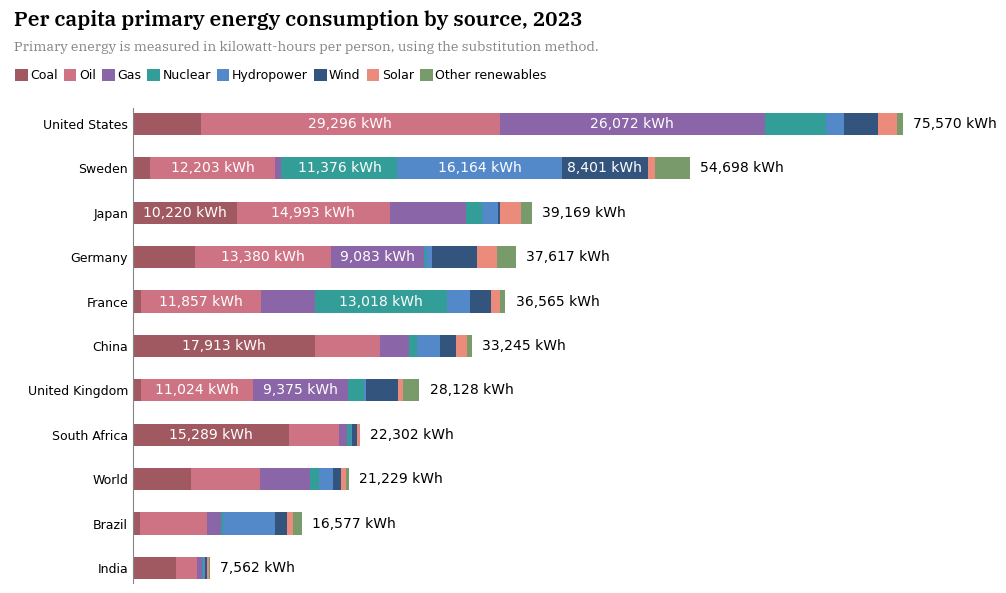

In [9]:
bottom = np.zeros(len(df_filtered))
fig, ax = plt.subplots(figsize=(10, 6))

for source in sources:
    values = df_filtered[source]
    bars = ax.barh(
        df_filtered["Country"],
        values,
        left=bottom,
        height=0.5,
        color=colors[source],
        label=source
    )

    for bar, val in zip(bars, values):
        if val > 8000:  # show only when enough space
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{round(int(val),3):,} kWh",
                ha='center', va='center',
                fontsize=10,
                fontweight='medium',
                color='white',
                fontname='DejaVu Sans'
            )

    bottom += values

# Axis, Texts, Legend
ax.set_xlabel("")
ax.set_xticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#848484')
ax.tick_params(axis='y', length=0)
ax.set_ylim(-0.34, len(df_filtered) - 0.64)
ax.set_yticks(range(len(countries_to_plot)))
ax.set_yticklabels(
    df_filtered["Country"], 
    fontweight="medium",
    fontsize=9, 
    fontfamily='DejaVu Sans'
)

plt.suptitle(
    "Per capita primary energy consumption by source, 2023",
    x=0.001,
    ha='left',
    fontsize=15,
    font=font_600,
    weight='bold'
)

plt.figtext(
    0.001, 0.912,
    "Primary energy is measured in kilowatt-hours per person, using the substitution method.",
    ha='left',
    fontsize=10,
    color='#848484',
    font = font_400
)


fig.legend(
    labels=colors.keys(),
    loc='upper center',
    bbox_to_anchor=(0.268, 0.9),
    columnspacing=0.5,
    handletextpad=0.2,
    ncol=len(colors),
    fontsize=9,
    frameon=False,
    handlelength=1,
    handleheight=1
)

# Values at the end of each bar
for i, total in enumerate(df_filtered["Total"]):
    ax.text(total+1000, i, f"{round(int(total), 3):,} kWh", va="center")

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
fig.savefig("energy_consumption.pdf")

The generated plot looks very much alike to the original plot. However, there is one small issue with the rounding of the values. Even with rounding to three decimals, the numbers sometimes vary at the third digit after the comma. 

## Animation
Now that the static plot has been finished for the most recent year of 2023, the bar charts are still missing for the complete time horizon. To achieve this, `FuncAnimation` will be used to create the animation and apply it to the plot every frame.\
This ultimately outputs a GIF file that loops through the energy consumption per capita year by year.

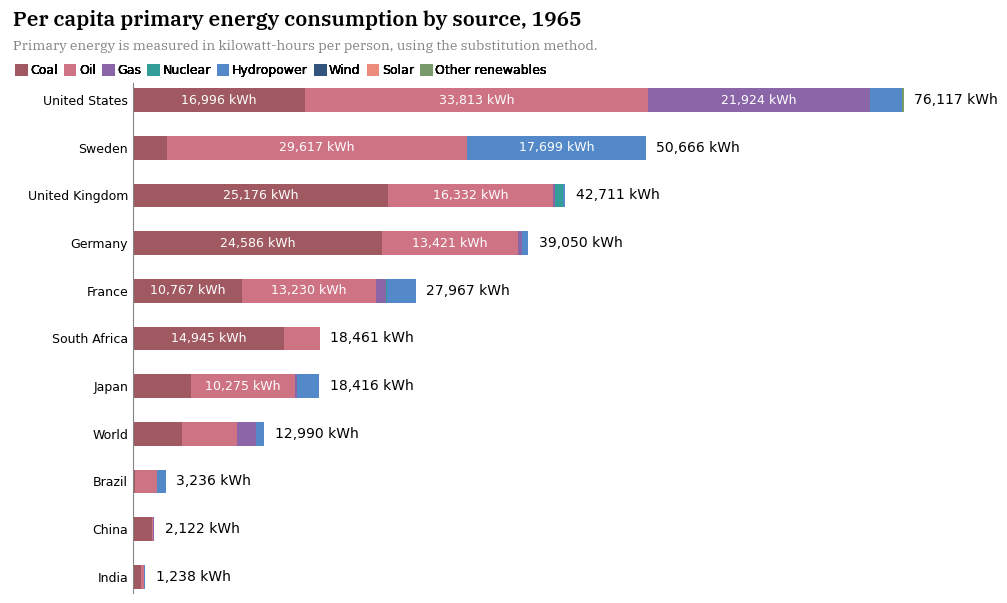

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

df = pd.read_csv('https://raw.githubusercontent.com/Rezixx/datavis/refs/heads/main/per-capita-energy-stacked.csv')

df = df.rename(columns={
    'Entity': 'Country',
    'Coal per capita (kWh)': 'Coal',
    'Oil per capita (kWh)': 'Oil',
    'Gas per capita (kWh)': 'Gas',
    'Nuclear per capita (kWh - equivalent)': 'Nuclear',
    'Hydro per capita (kWh - equivalent)': 'Hydropower',
    'Wind per capita (kWh - equivalent)': 'Wind',
    'Solar per capita (kWh - equivalent)': 'Solar',
    'Other renewables per capita (kWh - equivalent)': 'Other renewables'
})

countries_to_plot = [
    "United States", "Sweden", "Japan", "Germany", "France",
    "China", "United Kingdom", "South Africa", "World", "Brazil", "India"
]

sources = [
    'Coal', 'Oil', 'Gas', 'Nuclear', 'Hydropower',
    'Wind', 'Solar', 'Other renewables'
]
colors = {
    "Coal": "#a05961",
    "Oil": "#cd7384",
    "Gas": "#8a65a7",
    "Nuclear": "#339d98", 
    "Hydropower": "#5389c9",
    "Wind": "#33547c", 
    "Solar": "#ea8b7b",
    "Other renewables": "#799a6a" 
}

# Get all available years
years = sorted(df['Year'].unique())

fig, ax = plt.subplots(figsize=(10, 6))

# Define title and subtitle once
title = fig.text(0, 0.97, "", ha='left', fontsize=15, fontproperties=font_600, weight='bold')
subtitle = fig.text(0, 0.93, 
    "Primary energy is measured in kilowatt-hours per person, using the substitution method.",
    ha='left', fontsize=10, color='#848484', fontproperties=font_400)

def update(year):
    """
    Creates bar chart for each year.
    
    :param int year: The year to be plotted
    """
    
    ax.clear()
    
    # Filter data for current year and sort by total consumption
    df_year = df[df["Year"] == year]
    df_filtered = df_year[df_year["Country"].isin(countries_to_plot)].copy()
    df_filtered[sources] = df_filtered[sources].fillna(0)
    df_filtered["Total"] = df_filtered[sources].sum(axis=1)
    df_filtered = df_filtered.sort_values("Total", ascending=True)
    
    bottom = np.zeros(len(df_filtered))
    countries = df_filtered["Country"].values
    
    # Set fixed ticks before plotting
    ax.set_yticks(range(len(countries)))
    ax.set_yticklabels(
        countries,
        fontweight="medium",
        fontsize=9,
        fontname='DejaVu Sans'
    )
    
    for source in sources:
        values = df_filtered[source]
        bars = ax.barh(
            range(len(df_filtered)),
            values,
            left=bottom,
            height=0.5,
            color=colors[source],
            label=source
        )
        
        # Add value labels inside bars if there's enough space
        for bar, val in zip(bars, values):
            if val > 8000:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f"{int(val):,} kWh",
                    ha='center', va='center',
                    fontsize=9,
                    color='white',
                    fontname='DejaVu Sans'
                )
        bottom += values

    # Axis, Texts, Legend
    ax.set_xlabel("")
    ax.set_xticks([])
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#848484')
    ax.tick_params(axis='y', length=0)
    ax.set_ylim(-0.34, len(df_filtered) - 0.64)

    title.set_text(f"Per capita primary energy consumption by source, {year}")
    
    # Add legend, but only in first frame
    if year == years[0]:
        fig.legend(
            labels=colors.keys(),
            loc='upper center',
            bbox_to_anchor=(0.268, 0.925),
            columnspacing=0.5,
            handletextpad=0.2,
            ncol=len(colors),
            fontsize=9,
            frameon=False,
            handlelength=1,
            handleheight=1
        )
    
    for i, total in enumerate(df_filtered["Total"]):
        ax.text(total + 1000, i, f"{round(int(total),3):,} kWh", va="center")

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    
    # Terminate after last frame
    if year == years[-1]:
        return ax
    
ani = FuncAnimation(
    fig, 
    func=update, 
    frames=years,
    cache_frame_data=False
)

HTML(ani.to_jshtml())
ani.save('energy_consumption.gif', writer='pillow', fps=3, dpi=100)